In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo

/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet

/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo
Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 7.58 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.
Checking out files: 100% (2057/2057), done.
/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet


In [ ]:
!chmod +x ./darknet

In [ ]:
%cd darknet

/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet


In [ ]:
!export PATH=/usr/local/cuda-11.2/bin${PATH:+:${PATH}}

In [ ]:
!nvidia-smi

Tue Nov 15 16:04:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install cmake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet
!make

/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image

In [ ]:
ls

backup/   examples/       LICENSE       LICENSE.meta  obj/       scripts/
cfg/      include/        LICENSE.fuck  LICENSE.mit   python/    src/
darknet*  libdarknet.a    LICENSE.gen   LICENSE.v1    README.md
data/     libdarknet.so*  LICENSE.gpl   Makefile      results/


In [ ]:
!/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet/darknet

usage: /content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet/darknet <function>


In [ ]:
full_path_to_images = '/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/yolo_dataset-1'

"""
End of:
Setting up full path to directory with labelled images
"""


"""
Start of:
Creating file classes.names
"""

# Defining counter for classes
c = 0

# Creating file classes.names from existing one classes.txt
# Pay attention! If you're using Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with open(full_path_to_images + '/' + 'classes.names', 'w') as names, \
     open(full_path_to_images + '/' + 'classes.txt', 'r') as txt:

    # Going through all lines in txt file and writing them into names file
    for line in txt:
        names.write(line)  # Copying all info from file txt to names

        # Increasing counter
        c += 1

"""
End of:
Creating file classes.names
"""


"""
Start of:
Creating file labelled_data.data
"""

# Creating file labelled_data.data
# Pay attention! If you're using Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with open(full_path_to_images + '/' + 'labelled_data.data', 'w') as data:
    # Writing needed 5 lines
    # Number of classes
    # By using '\n' we move to the next line
    data.write('classes = ' + str(c) + '\n')

    # Location of the train.txt file
    data.write('train = ' + full_path_to_images + '/' + 'train.txt' + '\n')

    # Location of the test.txt file
    data.write('valid = ' + full_path_to_images + '/' + 'test.txt' + '\n')

    # Location of the classes.names file
    data.write('names = ' + full_path_to_images + '/' + 'classes.names' + '\n')

    # Location where to save weights
    data.write('backup = backup')


In [ ]:
import os


"""
Start of:
Setting up full path to directory with labelled images
"""

# Full or absolute path to the folder with images
# Find it with Py file getting-full-path.py
# Pay attention! If you're using Windows, yours path might looks like:
# r'C:\Users\my_name\Downloads\video-to-annotate'
# or:
# 'C:\\Users\\my_name\\Downloads\\video-to-annotate'
full_path_to_images = '/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/yolo_dataset-1'

"""
End of:
Setting up full path to directory with labelled images
"""


"""
Start of:
Getting list of full paths to labelled images
"""

# Check point
# Getting the current directory
# print(os.getcwd())

# Changing the current directory
# to one with images
os.chdir(full_path_to_images)

# Check point
# Getting the current directory
# print(os.getcwd())

# Defining list to write paths in
p = []

# Using os.walk for going through all directories
# and files in them from the current directory
# Fullstop in os.walk('.') means the current directory
for current_dir, dirs, files in os.walk('.'):
    # Going through all files
    for f in files:
        # Checking if filename ends with '.jpeg'
        if f.endswith('.jpeg'):
            # Preparing path to save into train.txt file
            # Pay attention!
            # If you're using Windows, it might need to change
            # this: + '/' +
            # to this: + '\' +
            # or to this: + '\\' +
            path_to_save_into_txt_files = full_path_to_images + '/' + f

            # Appending the line into the list
            # We use here '\n' to move to the next line
            # when writing lines into txt files
            p.append(path_to_save_into_txt_files + '\n')


# Slicing first 15% of elements from the list
# to write into the test.txt file
p_test = p[:int(len(p) * 0.15)]

# Deleting from initial list first 15% of elements
p = p[int(len(p) * 0.15):]

"""
End of:
Getting list of full paths to labelled images
"""


"""
Start of:
Creating train.txt and test.txt files
"""

# Creating file train.txt and writing 85% of lines in it
with open('train.txt', 'w') as train_txt:
    # Going through all elements of the list
    for e in p:
        # Writing current path at the end of the file
        train_txt.write(e)

# Creating file test.txt and writing 15% of lines in it
with open('test.txt', 'w') as test_txt:
    # Going through all elements of the list
    for e in p_test:
        # Writing current path at the end of the file
        test_txt.write(e)

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet
!make

/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not g

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/yolo_dataset-1
!/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet/darknet detector train /content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/yolo_dataset-1/labelled_data.data /content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/custom_weight/yolov4.conv.137 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 123532, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.677026, iou_loss = 0.000000, total_loss = 0.677026 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.825911), count: 4, class_loss = 0.002553, iou_loss = 0.297163, total_loss = 0.299717 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000003, iou_loss = 0.000000, total_loss = 0.000003 
 total_bbox = 123536, rewritten_bbox = 0.000000 % 

 Tensor Cores are used.
]2;8868/20000: loss=0.3 hours left=2.5
 8868: 0.253384, 0.337316 avg loss, 0.001000 rate, 1.143310 seconds, 35472 images, 2.497443 hours left
Load

# Testing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
net = cv2.dnn.readNetFromDarknet("/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/darknet/cfg/yolov3_custom_test.cfg","/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/backup/yolov3_custom_last.weights")

In [ ]:
classes = []
with open("/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/yolo_dataset-1/classes.names",'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [ ]:
img = cv2.imread(r"/content/drive/MyDrive/Colab_Notebooks/DKNSB_assigment_yolo/yolo_dataset-main/img_1.jpeg")
hight,width,_ = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255,(608,608),(0,0,0),swapRB = True,crop= False)

In [ ]:
net.setInput(blob)
output_layers_name = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_name)

In [ ]:
boxes =[]
confidences = []
class_ids = []

for output in layerOutputs:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.02:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * hight)
            w = int(detection[2] * width)
            h = int(detection[3]* hight)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            
            
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)
for output in layerOutputs:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        # if confidence>.2:
        #     print(confidence)

5415
0


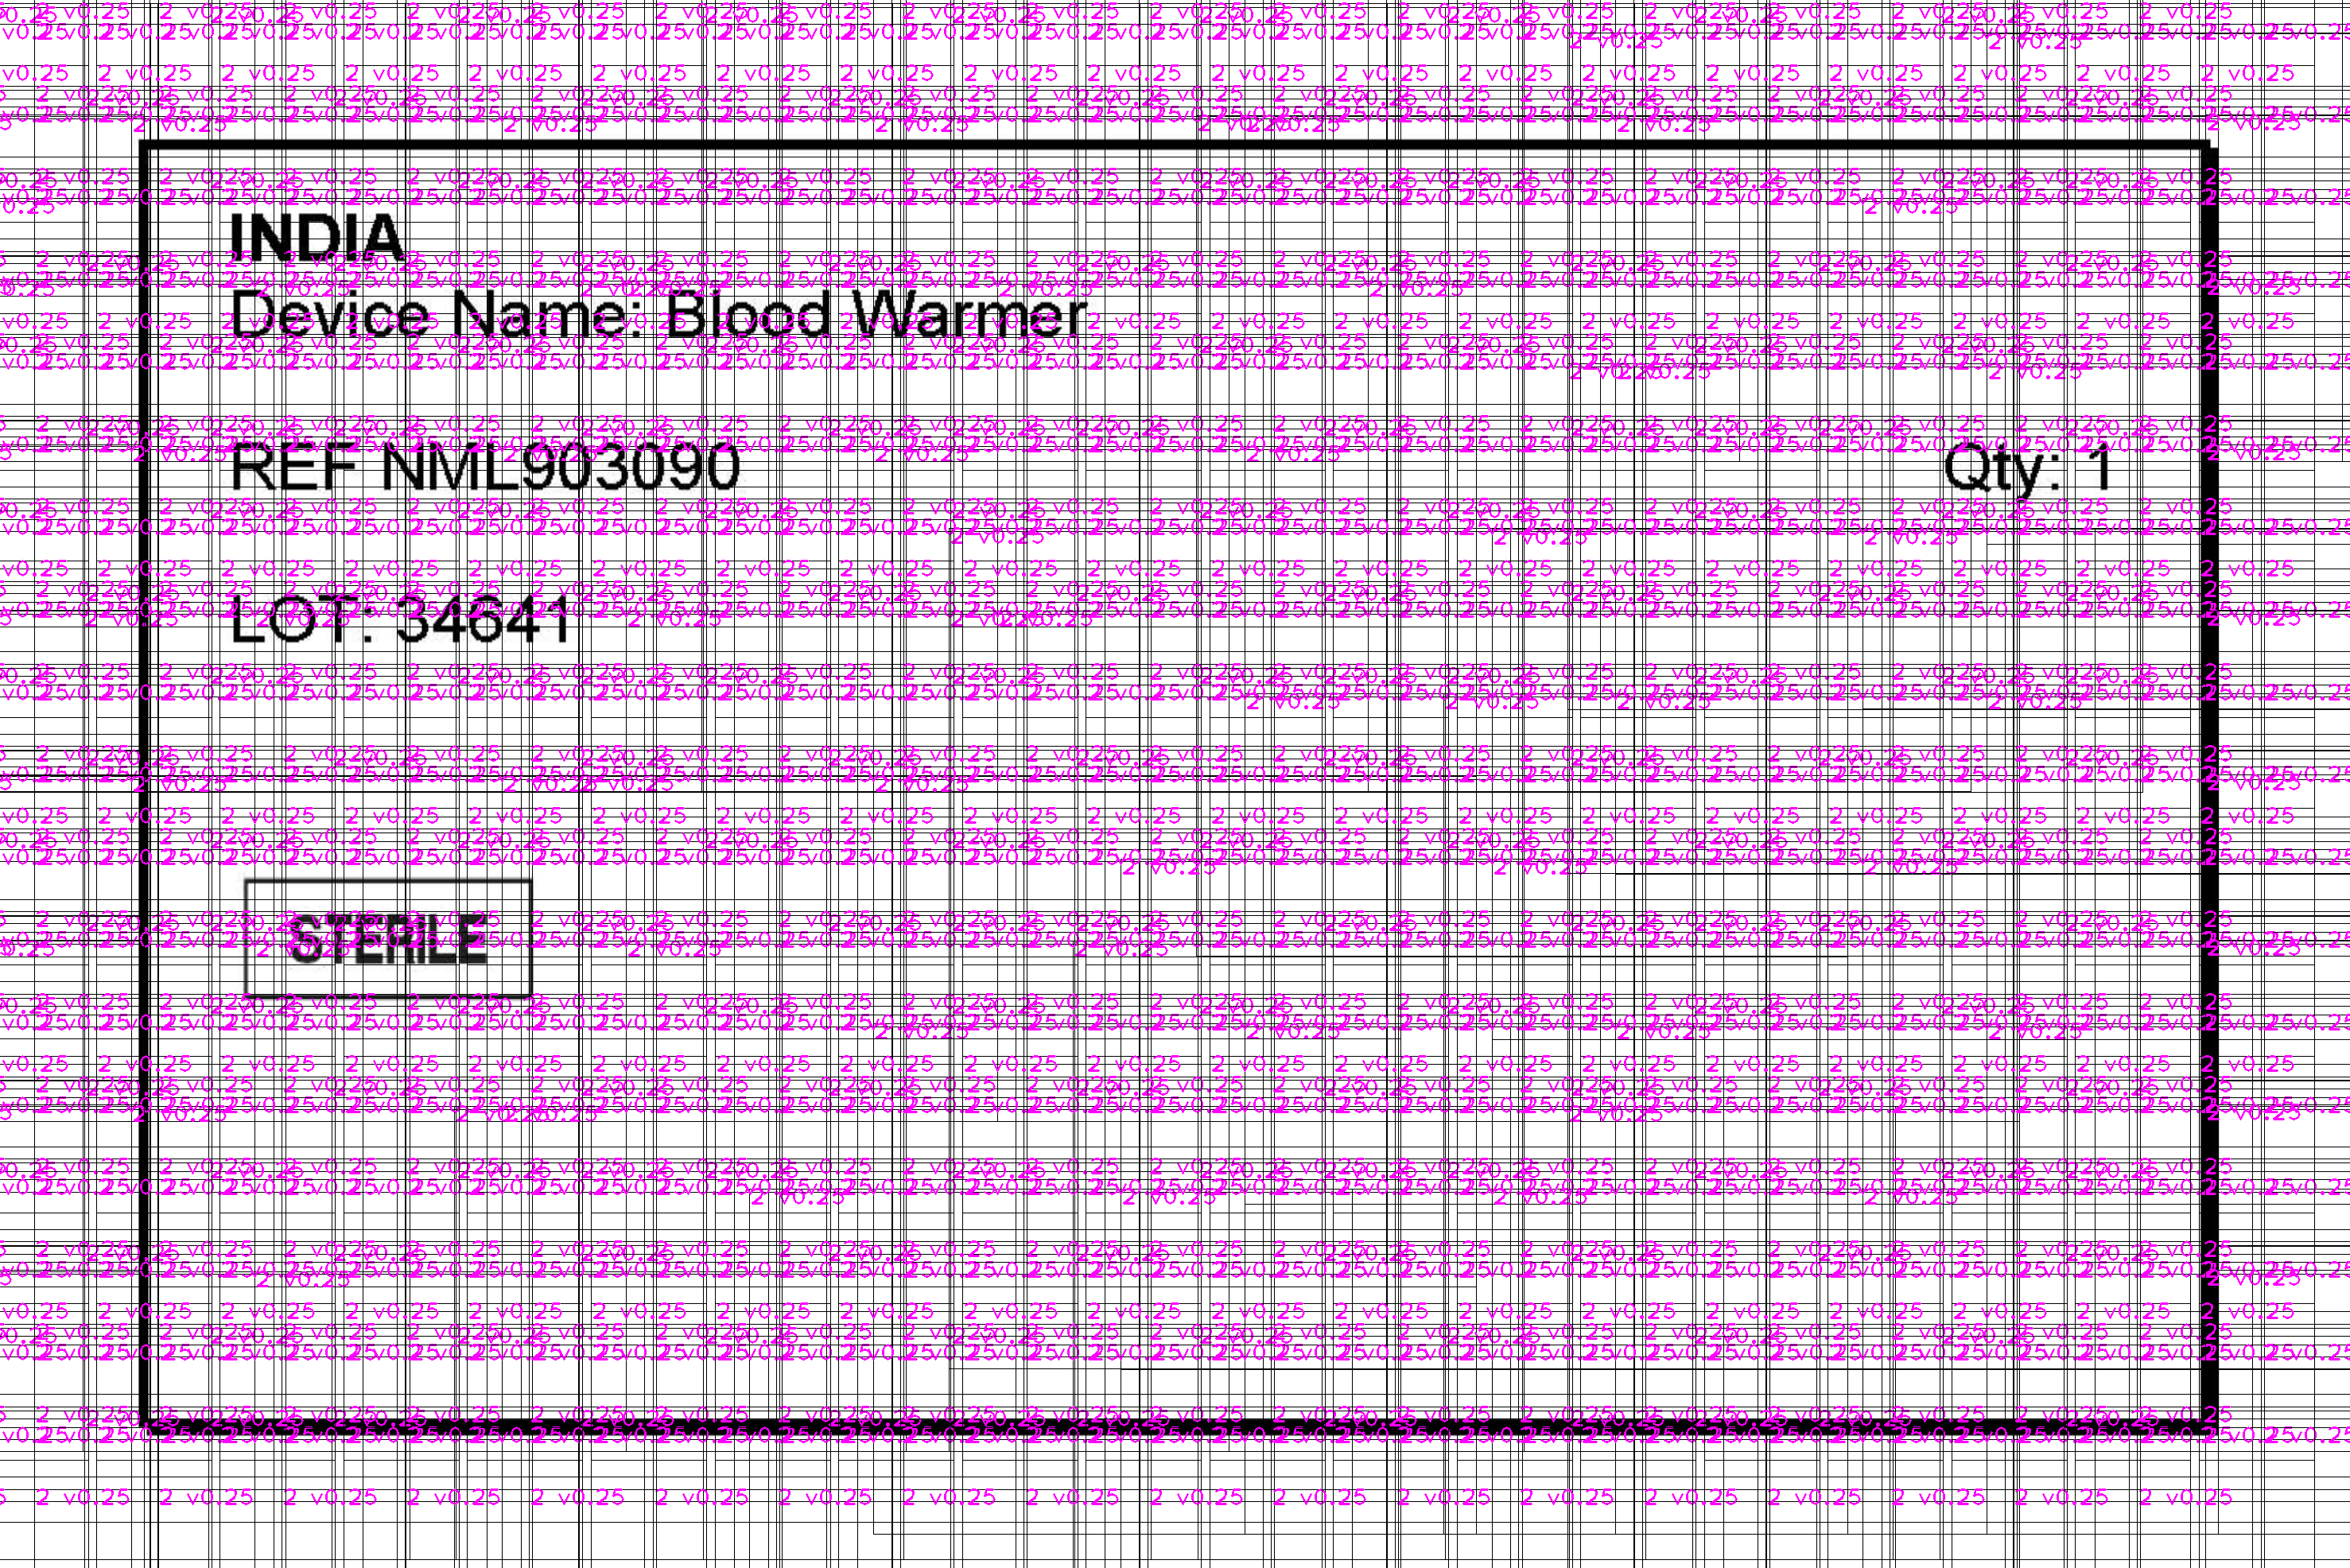

In [ ]:
boxes =[]
confidences = []
class_ids = []
from google.colab.patches import cv2_imshow


for output in layerOutputs:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.23:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * hight)
            w = int(detection[2] * width)
            h = int(detection[3]* hight)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            
            
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

print(len(boxes))
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.256,.1)
print(len(indexes))
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size =(len(boxes),3))
if  len(indexes)>0:
    for i in indexes.flatten():
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i],2))
        color = colors[i]
        cv2.rectangle(img,(x,y),(x+w,y+h),2)
        cv2.putText(img,label + " v" + confidence, (x,y+20),font,2,(255,0,255),2)

cv2_imshow(img)